In [1]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Sampling

**Inferential Statistics** makes inferences about a populations by examining one or more random samples drawn from that population. But **sampling** describes the methods of taking a sample from population in appropriate way.

![Illustration of Inferential Statistics](https://datatab.net/assets/tutorial/Descriptive_statistics_and_inferential_statistics.png)

For example, there are 1,000,000 citizens in some city. I want to measure the average height in this city.

But it is very hard and time-consuming to measure every single person.

Instead of this, we can bring a sample of 1,000 people and measure their height.

To make this experiment valuable, I must take a sample in **appropriate way**. If in my sample will be only tall people, my measurements would have no sense and product wrong results.

### Sampling in Python

To get sthe sample from population, we can use `random.sample(population: list, sampleSize: int)`.

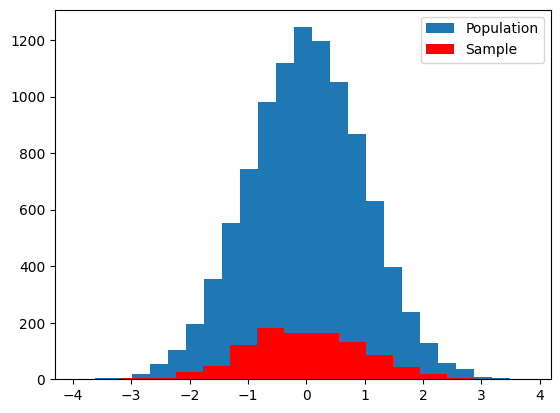

In [2]:
X = list(np.random.normal(0, 1, size = 10000))
sample = random.sample(X, 1000)

plt.hist(X, bins = 25, label = 'Population')
plt.hist(sample, bins = 15, color = 'red', label = 'Sample')
plt.legend()
plt.show()

# Effective Sampling

The common thought is to use large enough size of sample to get estimations that are very close to the population values.

For this purpose, I will conduct an experiment. I will examine the difference between the standard deviation of the population and that of the studied sample and present their difference. The goal is to investigate whether a larger sample size reduces the measurement error.
$$f(x) = \big| Std(\text{population}) - Std(\text{sample}) \big|$$

In [3]:
sample_sizes = list(range(100, 5000))

### Test for Uniform Distribution

Let $a = 0$ and $b = 100$.

In [4]:
a = 0
b = 100

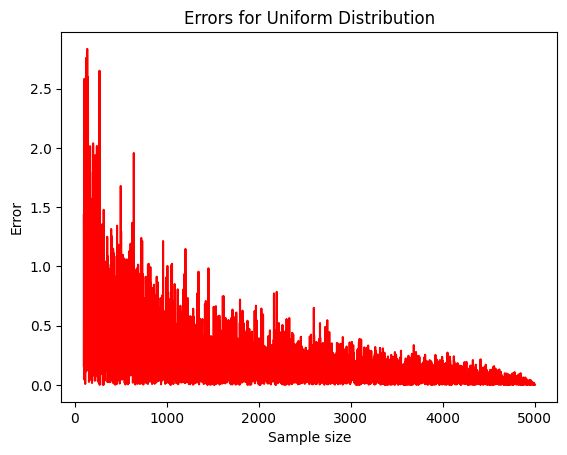

In [5]:
population = list(np.random.uniform(a, b, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Uniform Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

### Test for Normal Distribution

Let $Mean(X) = 50$ and $Std(X) = 10$.

In [6]:
mean = 50
std = 10

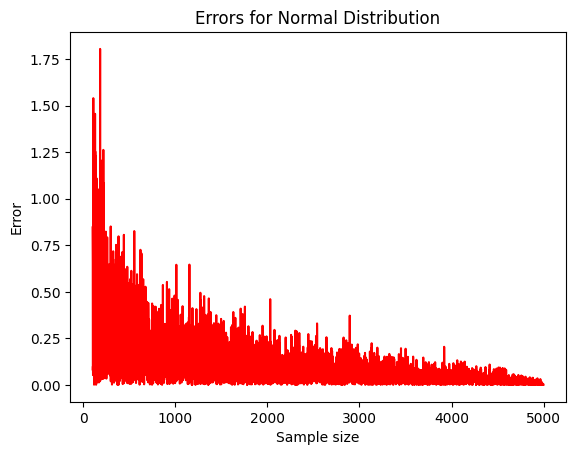

In [7]:
population = list(np.random.normal(mean, std, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Normal Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

### Test for Exponential Distribution

Let $\lambda = 0.02$

In [8]:
l = 0.02

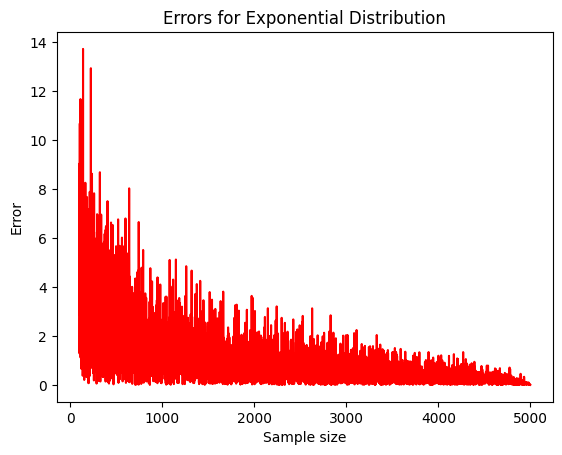

In [9]:
population = list(np.random.exponential(1 / l, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Exponential Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

The experiment confirms that once sample reaches a reasobable size, $Std(\text{sample})$ is a pretty good approximation of $Std(\text{population})$. Moreover, it can be observed that even with a sample size of $\displaystyle \frac{1}{5}$ of the population, we already obtain a very good approximation.

# Dividing By $n$ Underestimates the Variance

When estimating the mean, variance, and standard deviation from a sample, we must take into account the fact that, since we are making an estimate based on a sample—often much smaller than the population—our estimates will tend to be **underestimated**.

$$ \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - Mean(\text{sample}) \bigg]^2}}{\text{sample.size}} < \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - Mean(\text{population}) \bigg]^2}}{\text{sample.size}}$$

I can easily prove this by conducting an experiment where I count the number of cases in which the variance using sample mean is smaller than the variance using population mean and present some example results.

In [10]:
def temp_variance_test(data, data_mean):
    counter = 0

    for datum in data:
        counter = counter + (datum - data_mean) ** 2

    return counter /len(data)

In [11]:
attempts = 1000

In [12]:
smaller = 0
bigger = 0

for attempt in range(attempts):
    population = list(np.random.normal(20, 10, size = 1000000))
    sample = random.sample(population, k = 100)

    mean_population = lds.mean(population)
    mean_sample = lds.mean(sample)

    var_sample_pop = temp_variance_test(sample, mean_population)
    var_sample_sam = temp_variance_test(sample, mean_sample)

    if var_sample_sam < var_sample_pop:
        smaller = smaller + 1
    else:
        bigger = bigger + 1
    
    if attempt in [1, 2, 3, 4]:
        print(f'Example {attempt}: {var_sample_sam} < {var_sample_pop}')

print(f'...\n\nSmaller = {smaller}, Bigger = {bigger}')

Example 1: 106.08584643209178 < 106.08643631903324
Example 2: 73.33209155221735 < 74.54993770999006
Example 3: 102.30831684234838 < 102.49703708841933
Example 4: 69.46991243914994 < 72.69113939249702
...

Smaller = 1000, Bigger = 0


Each test confirms the above formula. The proof showing that the formula always holds is quite simple.

### Proof

Let $n = \text{sample.size}$ and $v$ be the mean.

$$f(v) = \frac{\sum_{i = 0}^{\text{n - 1}}{\bigg[ \text{sample}[i] - v \bigg]^2}}{n}$$

Our aim is to minimize the function $f(v)$ to find the value of $v$ where the variance is the lowest. To achieve this, we need to find the slope of the tangent line to $f(v)$ equal 0.

$$\frac{d}{dv}\bigg[ f(v) \bigg] = \frac{d}{dv}\bigg[ \frac{\sum_{i = 0}^{\text{n - 1}}{\big[ \text{sample}[i] - v \big]^2}}{n} \bigg] = \frac{\sum_{i = 0}^{\text{n - 1}}{\big[ 2(\text{sample}[i] - v) \times \text{sample}[i] - 1 \big]}}{n} = \frac{-2}{n}\sum_{i=0}^{n-1}\big[ \text{sample}[i] - v \big]$$

$$ \frac{d}{dv}\bigg[ f(v) \bigg] = 0 \implies \frac{-2}{n}\sum_{i=0}^{n-1}\big[ \text{sample}[i] - v \big] = 0 \implies v = \frac{\sum_{i=0}^{n-1}{\text{sample}[i]}}{n} \implies v = Mean(\text{sample}) $$

Thus, I have proven that for any sample, the value $v$ that minimizes the variance will be the sample mean. As a consequence, the results calculated from the sample will be underestimated. So, the conclusion is that for any value of $s$, the following statement is true.

$$ \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - Mean(\text{sample}) \bigg]^2}}{\text{sample.size}} < \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - s \bigg]^2}}{\text{sample.size}}$$

And that implies our hypothesis.

$$ \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - Mean(\text{sample}) \bigg]^2}}{\text{sample.size}} < \frac{\sum_{i = 0}^{\text{\text{sample.size} - 1}}{\bigg[ \text{sample}[i] - Mean(\text{population}) \bigg]^2}}{\text{sample.size}} \quad  \blacksquare$$

### Solution

To prevent underestimation of variance, and consequently standard deviation, we divide the sum of squares by $n-1$ instead of $n$, which better approximates our estimated values, but not to the extent of underestimating/overestimating the result.

Thus, we use two different formulas for variance, depending on whether we are analyzing values from a population or a sample.

<br>

**Variance of the population**

$$ Var_{p}(\text{population}) = \frac{\sum_{i = 0}^{\text{n - 1}}{\bigg[ \text{population}[i] - Mean(\text{population}) \bigg]^2}}{n} $$

<br>

**Variance of the sample**

$$ Var_{s}(\text{sample}) = \frac{\sum_{i = 0}^{\text{n - 1}}{\bigg[ \text{sample}[i] - Mean(\text{sample}) \bigg]^2}}{n - 1} $$

**Standard Deviation of the population**

$$Std_{p} = \sqrt{Var_{p}(\text{population})}$$

**Standard Deviation of the sample**

$$Std_{s} = \sqrt{Var_{s}(\text{sample})}$$

In [13]:
def var_p(data: list) -> float:
    """Calculates the variance of the population containing numbers (integers or/and floats).
       
       Variance indicates how much the data values differ from the mean. The bigger variance, the more spread out the data are."""
    
    counter = 0
    data_mean = lds.mean(data)

    for datum in data:
        counter = counter + (datum - data_mean) ** 2

    return counter / len(data)


def var_s(data: list) -> float:
    """Calculates the variance of the sample containing numbers (integers or/and floats).
       
       Variance indicates how much the data values differ from the mean. The bigger variance, the more spread out the data are."""
    
    counter = 0
    data_mean = lds.mean(data)

    for datum in data:
        counter = counter + (datum - data_mean) ** 2

    return counter / (len(data) - 1)


def std_p(data: list) -> float:
    """Calculates the standard deviation of the population containing numbers (integers or/and floats).
    
       Standard Deviation provides an easy-to-interpret measure of dispersion expressed in the same unit as the data."""
    
    return var_p(data) ** 0.5


def std_s(data: list) -> float:
    """Calculates the standard deviation of the sample containing numbers (integers or/and floats).
    
       Standard Deviation provides an easy-to-interpret measure of dispersion expressed in the same unit as the data."""
    
    return var_s(data) ** 0.5